# Import Libraries

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
# Loading the dataset
dataset = pd.read_csv('Data/DC_Prop_Residential1.csv', index_col= 'Unnamed: 0')
dataset = dataset.reset_index()

In [ ]:
dataset.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI
0,0,4,0,0,1,2.0,8,4,1910.0,1988.0,...,0,0,0,2.0,5,24,1680,1,93.0,31
1,1,3,1,1,1,2.0,9,5,1910.0,2009.0,...,0,1,0,2.0,4,24,1680,1,106.0,32
2,2,3,1,1,1,2.0,8,5,1900.0,2003.0,...,0,1,0,2.0,3,24,1680,1,106.0,22
3,3,3,2,1,1,1.0,10,5,1913.0,1972.0,...,0,1,0,1.0,4,11,2196,1,97.0,38
4,4,3,1,1,1,2.0,8,4,1906.0,2011.0,...,0,0,0,2.0,1,24,1627,1,105.0,39


In [ ]:
data = 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'WARD', 'SalevYB', 'SalevYI'
X = dataset.loc[:1000, data].values

In [ ]:
dataset.shape

(57798, 31)

In [ ]:
dataset.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI
0,0,4,0,0,1,2.0,8,4,1910.0,1988.0,...,0,0,0,2.0,5,24,1680,1,93.0,31
1,1,3,1,1,1,2.0,9,5,1910.0,2009.0,...,0,1,0,2.0,4,24,1680,1,106.0,32
2,2,3,1,1,1,2.0,8,5,1900.0,2003.0,...,0,1,0,2.0,3,24,1680,1,106.0,22
3,3,3,2,1,1,1.0,10,5,1913.0,1972.0,...,0,1,0,1.0,4,11,2196,1,97.0,38
4,4,3,1,1,1,2.0,8,4,1906.0,2011.0,...,0,0,0,2.0,1,24,1627,1,105.0,39


In [ ]:
X.shape

(1001, 30)

# Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)
# Ekstrak informasi


score_kemans_s = silhouette_score(X, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans.labels_)
score_kemans_d = davies_bouldin_score(X, predictions)
score_kemans_i = kmeans.inertia_
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print(f'Inrtia = {score_kemans_i:.4f}')

Silhouette Score: 0.5596
Calinski Harabasz Score: 1937.8953
Davies Bouldin Score: 0.5476
Inrtia = 55374458938728.4531


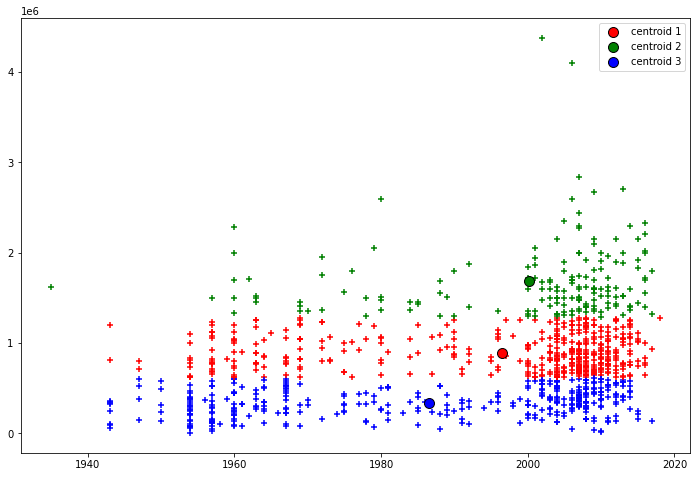

In [ ]:
c_sklearn = kmeans.labels_
new_z_sklearn = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
for i in range(len(c_sklearn)):
    if c_sklearn[i] == 0:
        plt.scatter(X[i,8], X[i,11], c='r', marker='+')
    elif c_sklearn[i] == 1:
        plt.scatter(X[i,8], X[i,11], c='g', marker='+')
    else:
        plt.scatter(X[i,8], X[i,11], c='b', marker='+')

plt.scatter(new_z_sklearn[0,8], new_z_sklearn[0,11], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(new_z_sklearn[1,8], new_z_sklearn[1,11], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(new_z_sklearn[2,8], new_z_sklearn[2,11], c='b', edgecolor='k', s=100, label='centroid 3')


plt.legend()
plt.show()


# Agglomerative

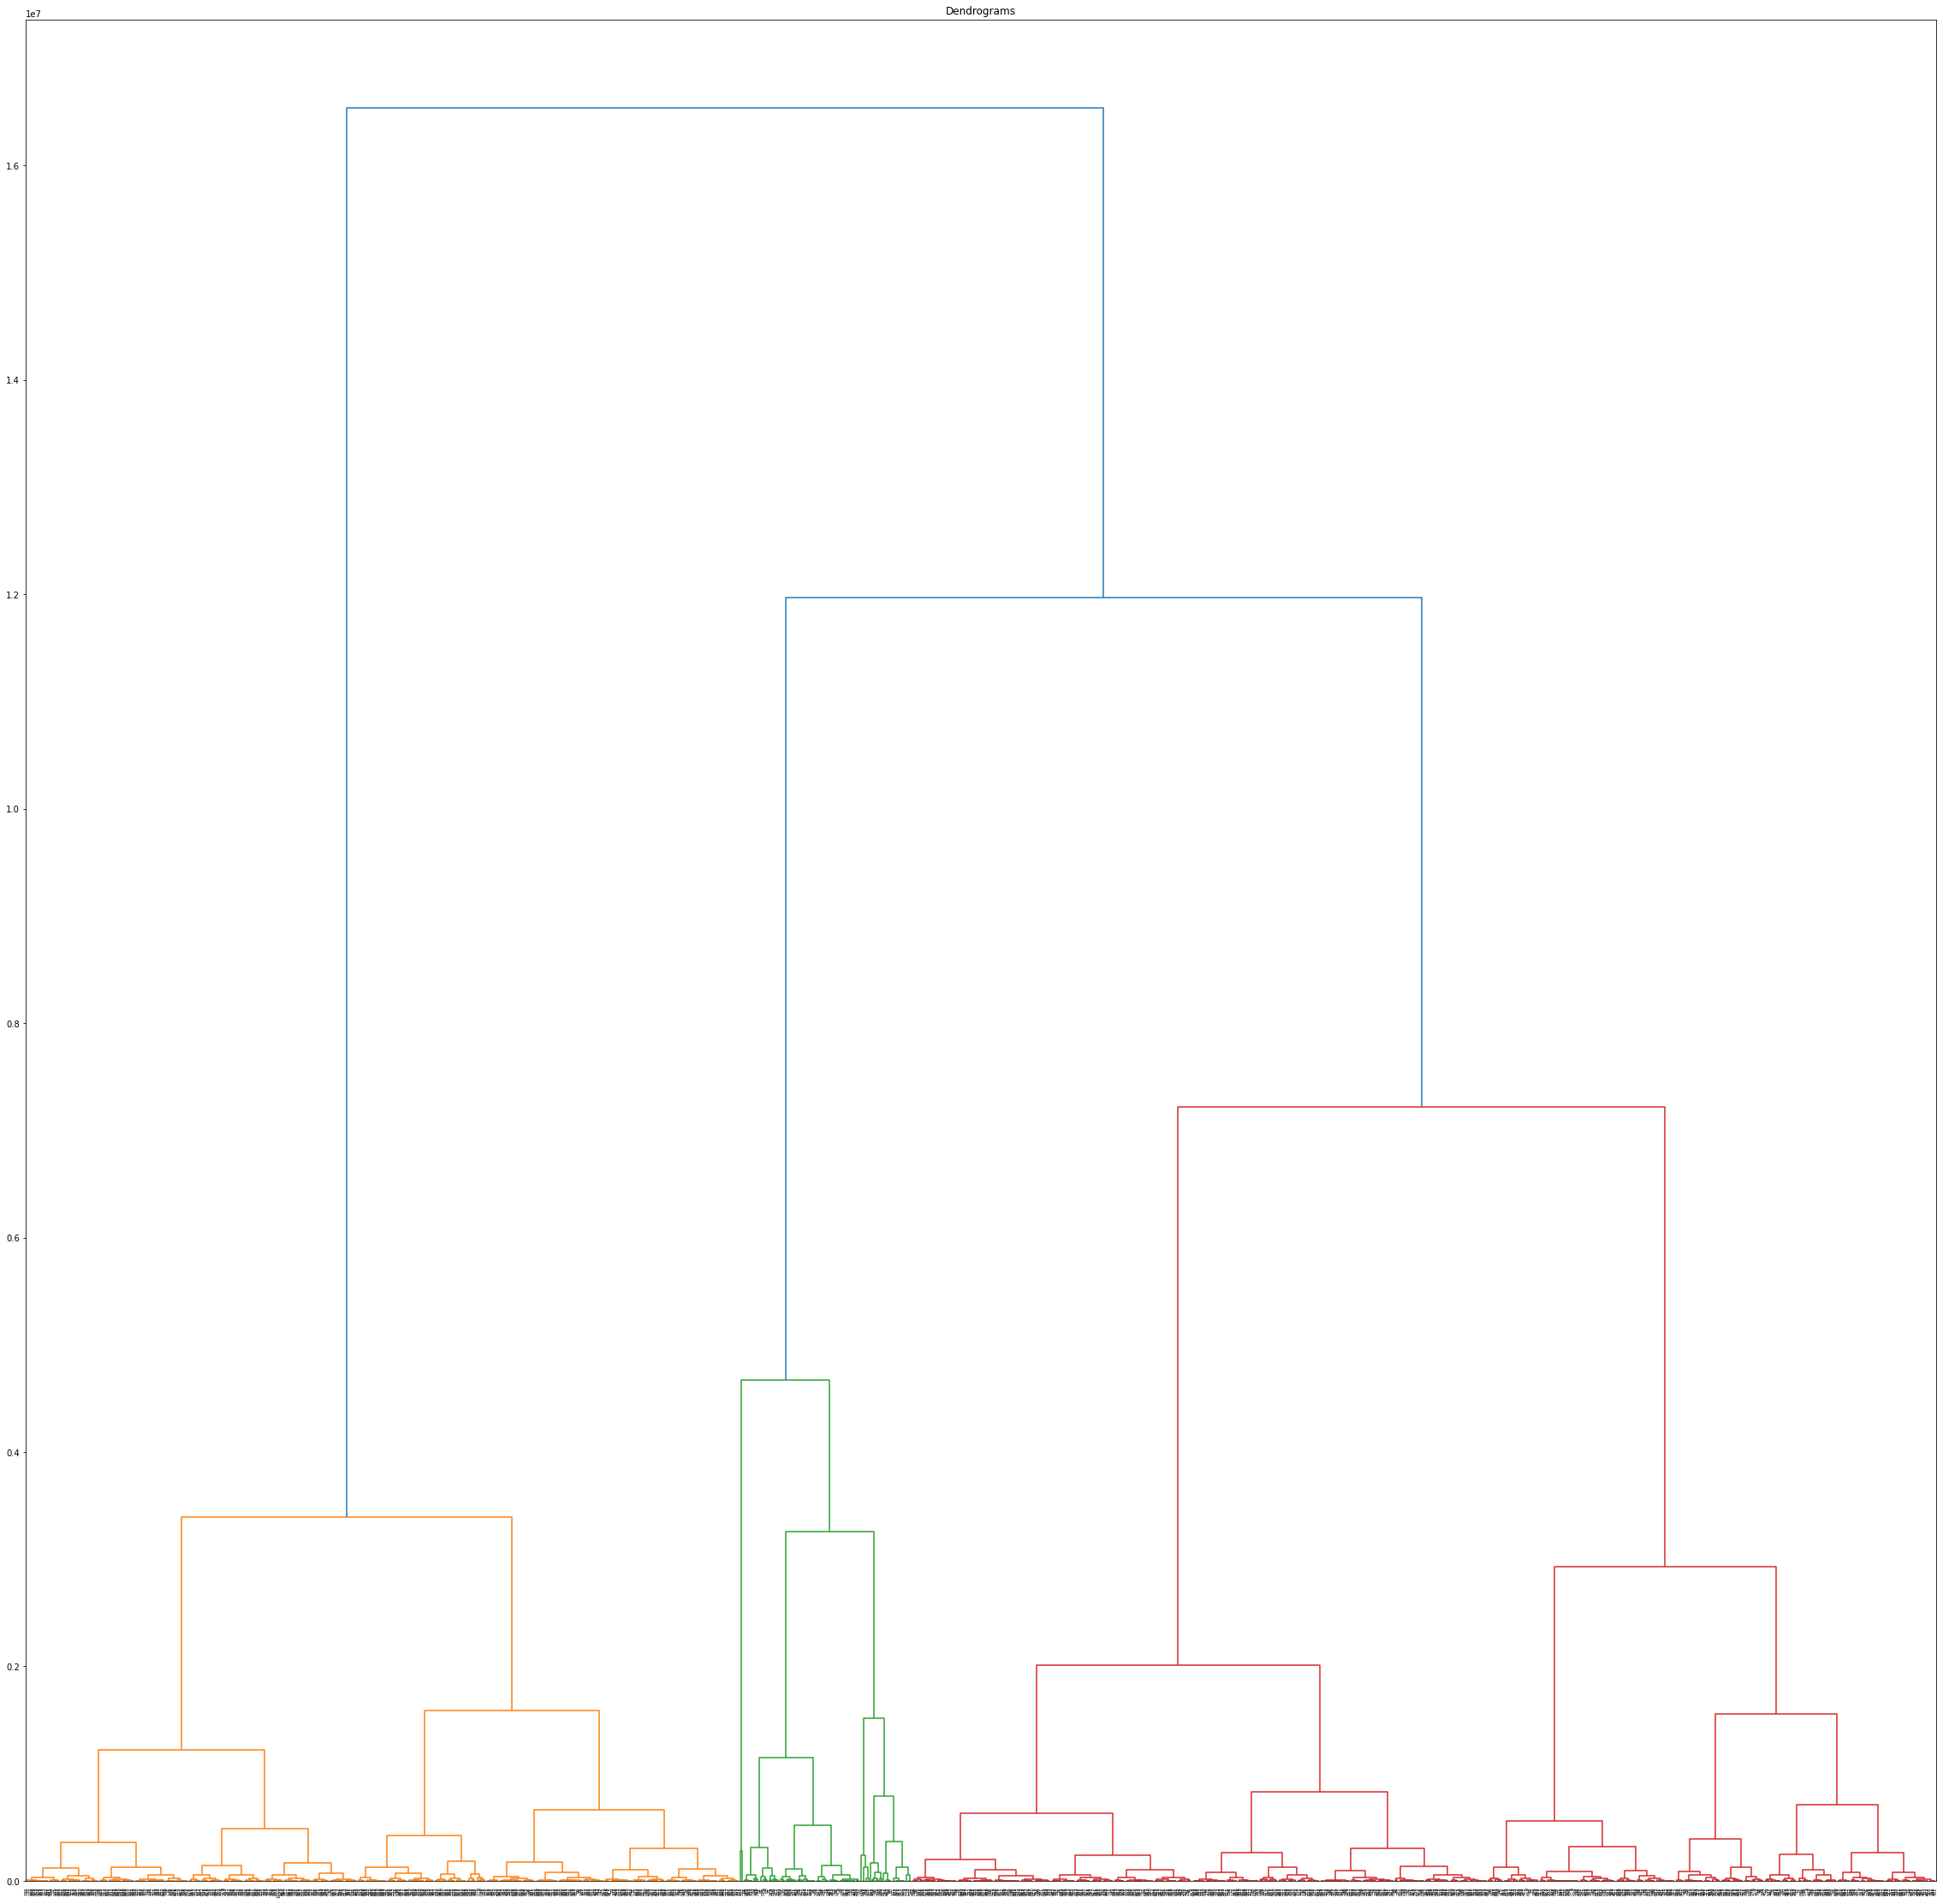

In [ ]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(40,40))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.5504
Calinski Harabasz Score: 2160.3531
Davies Bouldin Score: 0.5468


# Gaussian Mixture Modelling (GMM)

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 26,covariance_type= "full", random_state = 10)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.3569
Calinski Harabasz Score: 6373.8344
Davies Bouldin Score: 0.6225


# RESULT

Dari SC metode terbaik yang digunakan adalah Kmeans. Dari Kmeans kita bisa menginterpreasi hasil:

    - CLUSTER 1 = LOW RISK PROPERTY
    - CLUSTER 2 = MEDIUM RISK PROPERTY
    - CLUSTER 3 = MEDIUM RISK PROPERTY


Model Kmeans akan digunakan utk mengukur resiko property yang akan kita beli